MULTI- SPECTRAL SATELLITE IMAGE INTERPRETATION

1] IMPORTING LIBRARIES

In [1]:
# Core Libraries
import numpy as np                   # Efficient numerical operations
import pandas as pd                   # Handling tabular data (if needed)
import os                              # Directory management

# Image Processing & Augmentation
import cv2                             # OpenCV for image handling
import tensorflow as tf                # TensorFlow for deep learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation

# Model Building
from tensorflow.keras.models import Sequential      # Creating sequential model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # CNN layers

# Visualization
import matplotlib.pyplot as plt         # Plotting graphs
import seaborn as sns                   # Advanced plots (optional)

# Miscellaneous
from sklearn.model_selection import train_test_split  # Splitting dataset
from tensorflow.keras.utils import to_categorical     # Convert labels for CNN

In [2]:
from PIL import Image
import os

folder = r"D:\shrey_onedrive\Desktop\Satellite_Data"

for root, dirs, files in os.walk(folder):
    for file in files:
        if file.lower().endswith(('png', 'jpg', 'jpeg')):
            img_path = os.path.join(root, file)
            img = Image.open(img_path)
            if img.mode == 'CMYK':
                print(f"Converting {img_path} from CMYK to RGB")
                rgb_img = img.convert('RGB')
                rgb_img.save(img_path)  # overwrite original file with RGB version


2] DATA PRE-PROCESSING

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Define dataset path (modify this to your folder location)
DATASET_PATH = "D:\shrey_onedrive\Desktop\Satellite_Data"

# Image augmentation & preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values
    rotation_range=20,     # Random rotation
    horizontal_flip=True,  # Flip images
    brightness_range=[0.8,1.2],  # Adjust brightness
    validation_split=0.1   # 10% of data for validation
)

# Load images from dataset folders (Cloudy, Water, Green, Desert)
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical', # Multi-class classification
    subset='training' # Training data
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' # Validation data
)

print("Classes detected:", train_data.class_indices)  # Shows class labels


Found 5068 images belonging to 4 classes.
Found 563 images belonging to 4 classes.
Classes detected: {'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


3] DEFINING CNN MODEL

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  
    MaxPooling2D(2, 2),
    
    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),  
    MaxPooling2D(2, 2),
    
    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flatten Layer
    Flatten(),
    
    # Fully Connected Layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevents overfitting
    Dense(64, activation='relu'),
    
    # Output Layer (4 categories)
    Dense(4, activation='softmax')  # Multiclass classification
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Multiclass classification loss
    optimizer='adam',  # Efficient optimizer
    metrics=['accuracy']  # Track accuracy
)

# Display model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)     




4] TRAINING THE CNN MODEL

5] PLOT TRAINING ACCURACY AND LOSS

In [6]:
# Set number of epochs
EPOCHS = 10

# Train the model
history = model.fit(
    train_data,  # Training dataset
    validation_data=val_data,  # Validation dataset
    epochs=EPOCHS
)

# Save the trained model (optional)
model.save("cnn_satellite_model.h5")  # Saves model for later use


Epoch 1/10


159/159 [==============================] - 305s 2s/step - loss: 0.6761 - accuracy: 0.6371 - val_loss: 0.5615 - val_accuracy: 0.7176
Epoch 2/10
159/159 [==============================] - 296s 2s/step - loss: 0.5020 - accuracy: 0.7747 - val_loss: 0.4280 - val_accuracy: 0.7709
Epoch 3/10
159/159 [==============================] - 295s 2s/step - loss: 0.4551 - accuracy: 0.8052 - val_loss: 0.4487 - val_accuracy: 0.8153
Epoch 4/10
159/159 [==============================] - 33965s 215s/step - loss: 0.3930 - accuracy: 0.8341 - val_loss: 0.5242 - val_accuracy: 0.8295
Epoch 5/10
159/159 [==============================] - 117s 737ms/step - loss: 0.3954 - accuracy: 0.8319 - val_loss: 0.3830 - val_accuracy: 0.8135
Epoch 6/10
159/159 [==============================] - 136s 857ms/step - loss: 0.3650 - accuracy: 0.8487 - val_loss: 0.3692 - val_accuracy: 0.8437
Epoch 7/10
159/159 [==============================] - 142s 893ms/step - loss: 0.3659 - accuracy: 0.8534 - val_loss: 0.3258 - val_a

C:\Users\pande\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


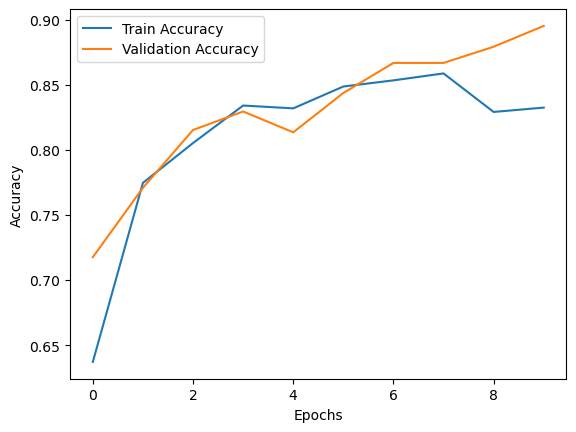

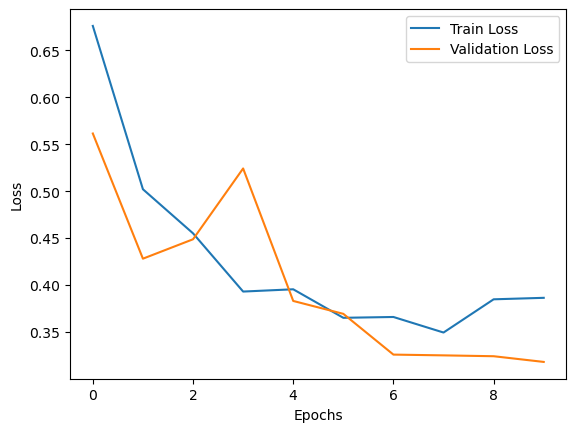

In [7]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6] EVALUATE MODEL PERFORMANCE

Found 5631 images belonging to 4 classes.
176/176 [==============================] - 245s 1s/step
Confusion Matrix:
 [[1350  131    7   12]
 [  48 1083    0    0]
 [   0    0 1424   76]
 [  30    0  388 1082]]

Classification Report:
               precision    recall  f1-score   support

      cloudy       0.95      0.90      0.92      1500
      desert       0.89      0.96      0.92      1131
  green_area       0.78      0.95      0.86      1500
       water       0.92      0.72      0.81      1500

    accuracy                           0.88      5631
   macro avg       0.89      0.88      0.88      5631
weighted avg       0.89      0.88      0.88      5631



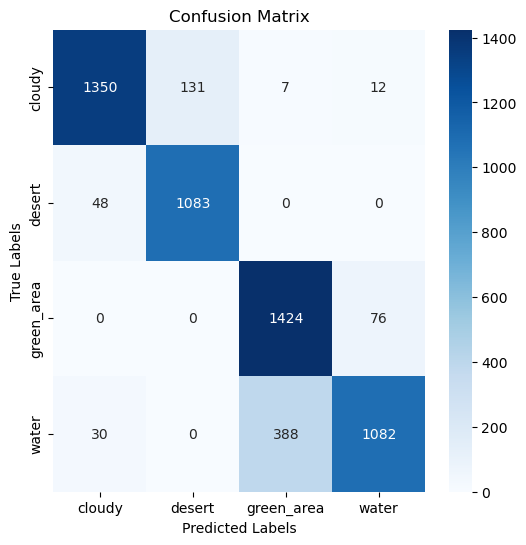

In [8]:
# Load test dataset (Modify dataset path if needed)
from sklearn.metrics import confusion_matrix, classification_report

test_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict test images
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels
true_classes = test_data.classes  # Actual labels
class_names = list(test_data.class_indices.keys())  # Get class names

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(true_classes, predicted_classes, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


7] SAVING THE MODEL FOR FUTURE USE

In [9]:
model.save("cnn_satellite_classifier.keras")

In [10]:
model.save("cnn_model.h5")  # Saves the model as cnn_model.h5

C:\Users\pande\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
